<a href="https://colab.research.google.com/github/fasihere/Sudoku-Digit-Recognizer/blob/master/Digit_recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x  # this line is not required unless you are in a notebook
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # this line is not required unless you are in a notebook`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.


In [ ]:
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


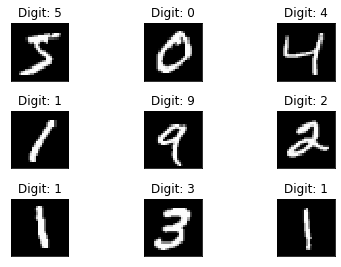

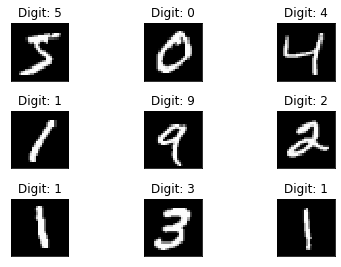

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
X_train.shape

(60000, 28, 28)

Text(0.5, 1.0, 'Pixel Value Distribution')

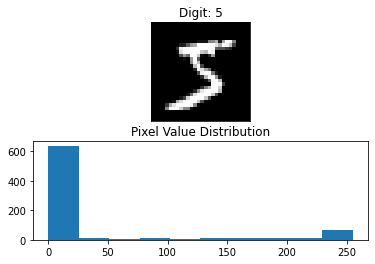

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [ ]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [ ]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [ ]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import argparse
((trainData, trainLabels), (testData, testLabels)) = mnist.load_data()

# add a channel (i.e., grayscale) dimension to the digits
trainData = trainData.reshape((trainData.shape[0], 28, 28, 1))
testData = testData.reshape((testData.shape[0], 28, 28, 1))

# scale data to the range of [0, 1]
trainData = trainData.astype("float32") / 255.0
testData = testData.astype("float32") / 255.0

# convert the labels from integers to vectors
le = LabelBinarizer()
trainLabels = le.fit_transform(trainLabels)
testLabels = le.transform(testLabels)
print(trainLabels[0])

11501568/11490434 [==============================] - 0s 0us/step
[0 0 0 0 0 1 0 0 0 0]


In [ ]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

KeyboardInterrupt: ignored

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
class SudokuNet:
	@staticmethod
	def build(width, height, depth, classes):
		# initialize the model
		model = Sequential()
		inputShape = (height, width, depth)# first set of CONV => RELU => POOL layers
		model.add(Conv2D(32, (5, 5), padding="same",
			input_shape=inputShape))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# second set of CONV => RELU => POOL layers
		model.add(Conv2D(32, (3, 3), padding="same"))
		model.add(Activation("relu"))
		model.add(MaxPooling2D(pool_size=(2, 2)))

		# first set of FC => RELU layers
		model.add(Flatten())
		model.add(Dense(64))
		model.add(Activation("relu"))
		model.add(Dropout(0.5))

		# second set of FC => RELU layers
		model.add(Dense(64))
		model.add(Activation("relu"))
		model.add(Dropout(0.5))

		# softmax classifier
		model.add(Dense(classes))
		model.add(Activation("softmax"))

		# return the constructed network architecture
		return model

In [ ]:
# compiling the sequential model
model = SudokuNet.build(width=28, height=28, depth=1, classes=10)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
BATCH_SIZE = 128
EPOCHS = 25

In [ ]:
# training the model and saving metrics in history
history = model.fit(trainData, trainLabels,
          batch_size=BATCH_SIZE, epochs=EPOCHS,
          verbose=2,
          validation_data=(testData, testLabels))


Epoch 1/25
469/469 - 2s - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.0446 - val_accuracy: 0.9934
Epoch 2/25
469/469 - 2s - loss: 0.0243 - accuracy: 0.9922 - val_loss: 0.0497 - val_accuracy: 0.9930
Epoch 3/25
469/469 - 2s - loss: 0.0240 - accuracy: 0.9923 - val_loss: 0.0506 - val_accuracy: 0.9932
Epoch 4/25
469/469 - 2s - loss: 0.0237 - accuracy: 0.9923 - val_loss: 0.0528 - val_accuracy: 0.9932
Epoch 5/25
469/469 - 2s - loss: 0.0249 - accuracy: 0.9920 - val_loss: 0.0546 - val_accuracy: 0.9933
Epoch 6/25
469/469 - 2s - loss: 0.0228 - accuracy: 0.9924 - val_loss: 0.0468 - val_accuracy: 0.9935
Epoch 7/25
469/469 - 2s - loss: 0.0222 - accuracy: 0.9932 - val_loss: 0.0479 - val_accuracy: 0.9926
Epoch 8/25
469/469 - 2s - loss: 0.0236 - accuracy: 0.9927 - val_loss: 0.0552 - val_accuracy: 0.9931
Epoch 9/25
469/469 - 2s - loss: 0.0217 - accuracy: 0.9932 - val_loss: 0.0578 - val_accuracy: 0.9932
Epoch 10/25
469/469 - 2s - loss: 0.0239 - accuracy: 0.9925 - val_loss: 0.0659 - val_accuracy: 0.9932

In [ ]:
# saving the model
import os
save_dir = r'/content/results'
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/results/keras_mnist.h5 


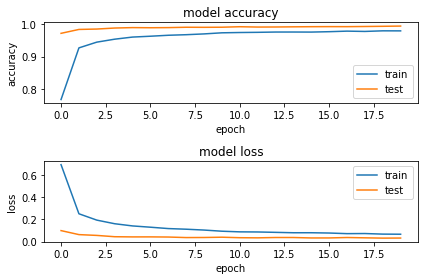

In [ ]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
mnist_model = load_model(model_path)
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0645 - accuracy: 0.9821
Test Loss 0.06448589265346527
Test Accuracy 0.9821000099182129


/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(10000,)

9821  classified correctly
179  classified incorrectly


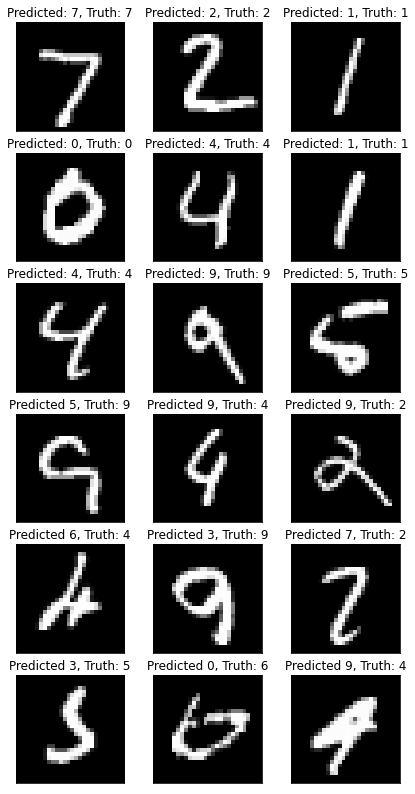

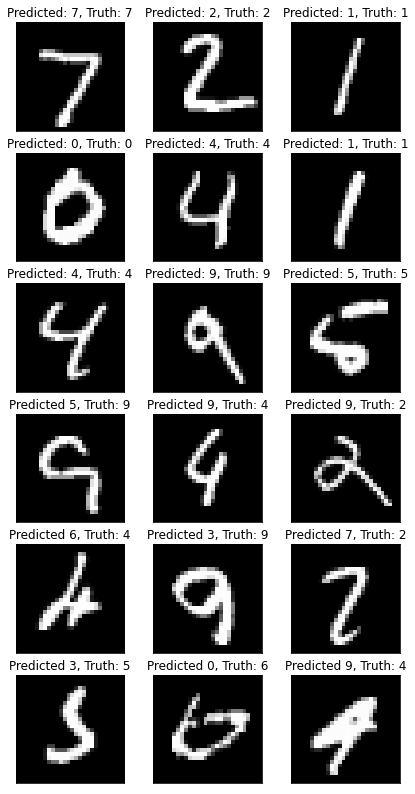

In [ ]:
# load the model and create predictions on the test set
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(X_test)
print(predicted_classes.shape)
# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation

In [ ]:
cells = np.load('/content/cells.npy')
# load the model and create predictions on the test set
mnist_model = load_model(model_path)
predicted_classes = mnist_model.predict_classes(cells)
print(predicted_classes.shape,"\n\n",predicted_classes)

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(9, 9) 

 [[5 3 3 3 3 3 3 3 5]
 [3 5 3 5 3 5 3 5 3]
 [3 3 5 3 3 3 5 3 3]
 [3 3 3 5 3 3 3 5 3]
 [3 3 5 3 3 3 5 3 5]
 [3 3 3 2 3 5 3 5 3]
 [3 3 5 3 5 3 3 3 3]
 [3 3 3 5 3 3 3 3 3]
 [3 3 3 3 3 3 3 3 3]]
